# Jupyter Notebook 1 - EDA - First Exploration on data

---

A Notebook to do some initial exploration of the data.

More detail will be added to the Data Section of the final report.

In [5]:
# Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from matplotlib import dates as mdates

---

## Load all the files 

In [6]:
# Load all the data files from the folder and name them data_1, data_2, data_3, etc

# Folder path
folder_path = "C:/Users/Kolobane/OneDrive/CIT MSc Data Science Modules/_Semester Three - Final Project/Project Two - Network Project/Data"

# get a list of all the csv file names in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# loop though the file names above and save the data into seperate dataframes
for i, file_name in enumerate(file_names):
    file_path = os.path.join(folder_path, file_name)
    variable_name = f"data_{i+1}"
    globals()[variable_name] = pd.read_csv(file_path)

In [7]:
data_1.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


**Description of first dataset:**
- Mostly numeric columns of network traffic.
- Some meta data with Port and IP address information (depends on the dataset).
- Labels for the type of attack data with a "Benign" label or a label with the type of attack type.

---

## Explore each of the datasets

Barplot to look at the distribution of data across the different datasets.

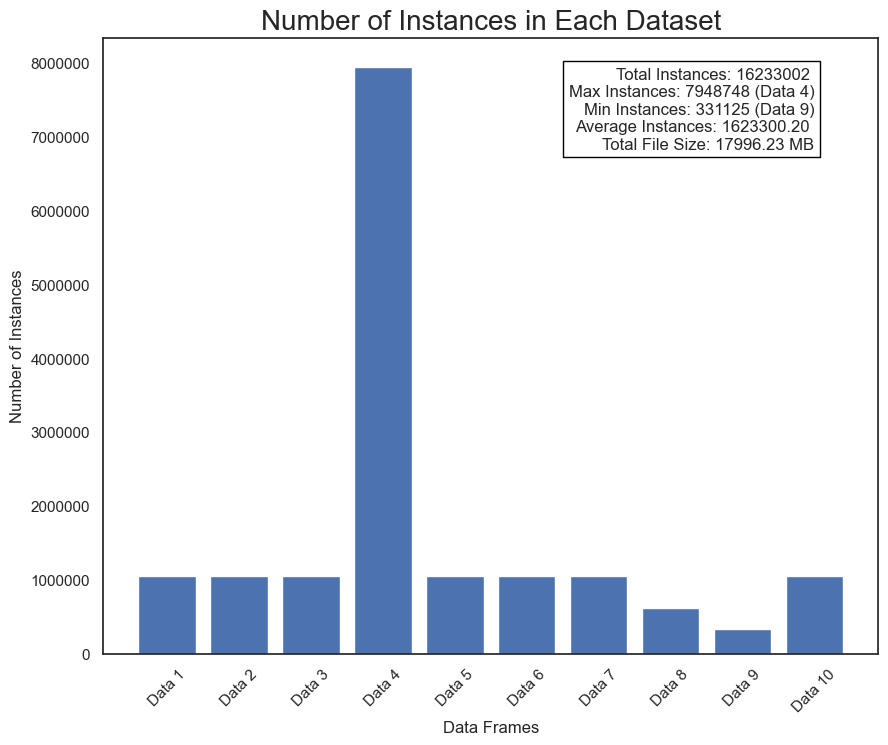

In [8]:
# Change the theme
sns.set_theme(style="white")

# All datasets
dataframes = [data_1, data_2, data_3, data_4, data_5,
             data_6, data_7, data_8, data_9, data_10]

# Get the total number of rows
row_counts = [len(df) for df in dataframes]
total_rows = sum(row_counts)

# Get the column with the maxium number of instances
max_instances = max(row_counts)
max_instances_index = row_counts.index(max_instances)
max_instances_column = f"Data {max_instances_index +1 }"

# Get the column with the lowest number of instances
min_instances = min(row_counts)
min_instances_index = row_counts.index(min_instances)
min_instances_column = f"Data {min_instances_index +1 }"

# Get the average number of instances
average_instances = total_rows / len(dataframes)

# Get the sixe of all the files
sizes = [df.memory_usage(deep=True).sum() for df in dataframes]
total_size_bytes =  sum(sizes)
total_size_mb = total_size_bytes / (1024 * 1024)

# Create a figure with a specfic size
plt.figure(figsize=(10,8))

# Create a bar chart
plt.bar(range(len(row_counts)), row_counts)
plt.xlabel("Data Frames")
plt.ylabel("Number of Instances")
plt.title("Number of Instances in Each Dataset", fontsize=20)

# Add labels to the x axis
plt.xticks(range(len(row_counts)), ["Data 1", "Data 2", "Data 3", "Data 4",
                                    "Data 5", "Data 6", "Data 7", "Data 8",
                                    "Data 9", "Data 10"], rotation=45)

# Allow y-axis to have values.
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

# Add a box with the total amount of rows
info_text = f"Total Instances: {total_rows} \n" \
            f"Max Instances: {max_instances} ({max_instances_column})\n" \
            f"Min Instances: {min_instances} ({min_instances_column})\n" \
            f"Average Instances: {average_instances:.2f} \n" \
            f"Total File Size: {total_size_mb:.2f} MB"


plt.text(len(row_counts) -1, max(row_counts), info_text,
        ha="right", va="top", bbox=dict(facecolor="white",
                                          edgecolor="black"))

# Save the plot to file.
# plt.savefig("C:/Users/Kolobane/OneDrive/CIT MSc Data Science Modules/_Semester Three - Final Project/Project Two - Network Project/Save Plots/Number of Rows in Each Dataset.png")

plt.show()

**Note:**
   - There are a total of over 16 Million instances with 16,233,002 in all.
   - The highest number of instances is in Dataset number 4 and have nearly 7,948,748 million instances.
   - The lowest number of instances is in Dataset 9 and has 331,125 instances.
   - And the average number of instances are 1,623,300. Although this value is highly affected by the fourth dataset. This is not an issue.

---

### **Day 1: 02-14-2018**

#### Types of Attacks

In [9]:
# What type of attack is in this data
data_1["Label"].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

**Types of attacks:**
- Benign
- FTP-BruteForce
- SSH-BruteForce


**FTP Brute Force**

FTP(File Transfer Protocol) is a network protocol that is used to transfer files between clients and a server. FTP-Brute Force is a type of cyber attack where an attacker attempts to gain access to an FTP server by unauthorised means. An attacker will use different automatic tools to try and gain access to an FTP server by trying to guess the credentials by applying "brute force". 


**SSH Brute Force**

SSH(Secure Shell) is a secure network protocol used for secure remote access to computer systems. SSH Brute Force is similar to FTP Brute Force but targets SSH servers.


#### Description of the Cyber Security Attack

In [10]:
# Create a function to get some data from the data_1
def data_structure(data, day):
    print(day)
    
    data.shape
    print(f"Number of rows for {day}:", data.shape[0])
    print(f"Number of features for {day}:", data.shape[1])
    
    value_counts = data["Label"].value_counts()
    print(value_counts.to_string())

In [11]:
# Call Defination for Day 1 Data
data_structure(data_1, "Day 1")

Day 1
Number of rows for Day 1: 1048575
Number of features for Day 1: 80
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589


#### Plots to describe distribution for Day 1

In [12]:
def plot_distribution(data, data_name, save_plot=False):
    
    # Extract the day number from the data name
    name, day_number = data_name.split("_")
    name = name.replace("_", "")
    
    # Get a count of the different labels
    label_counts = data["Label"].value_counts()

    # Create two plots
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))

    # Plot 1: Barplot
    ax1.bar(label_counts.index, label_counts)
    ax1.set_title(f"Barplot of Day {day_number} distribution", fontsize=16)
    ax1.set_xlabel("Label", fontsize=14)
    ax1.set_ylabel("Number of instances", fontsize=14)
    
    # Some days have a large 
    ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax1.set_yticklabels(['{:.0f}'.format(x) for x in ax1.get_yticks()])
    
    # Rotate labels 45 degrees
    ax1.set_xticklabels(label_counts.index, rotation=45)

    # Plot 2: Pie Chart
    ax2.pie(label_counts.values, labels=label_counts.index, autopct=lambda p: "{:.1f}%".format(p) if p > 0 else "", labeldistance=1.2)
    ax2.set_title(f"Piechart of Day {day_number} distribution", fontsize=16)
    
    #if save_plot:
    plt.savefig(f"C:/Users/Kolobane/OneDrive/CIT MSc Data Science Modules/_Semester Three - Final Project/Project Two - Network Project/Save Plots/{data_name}_plot.png")

    
    plt.show()

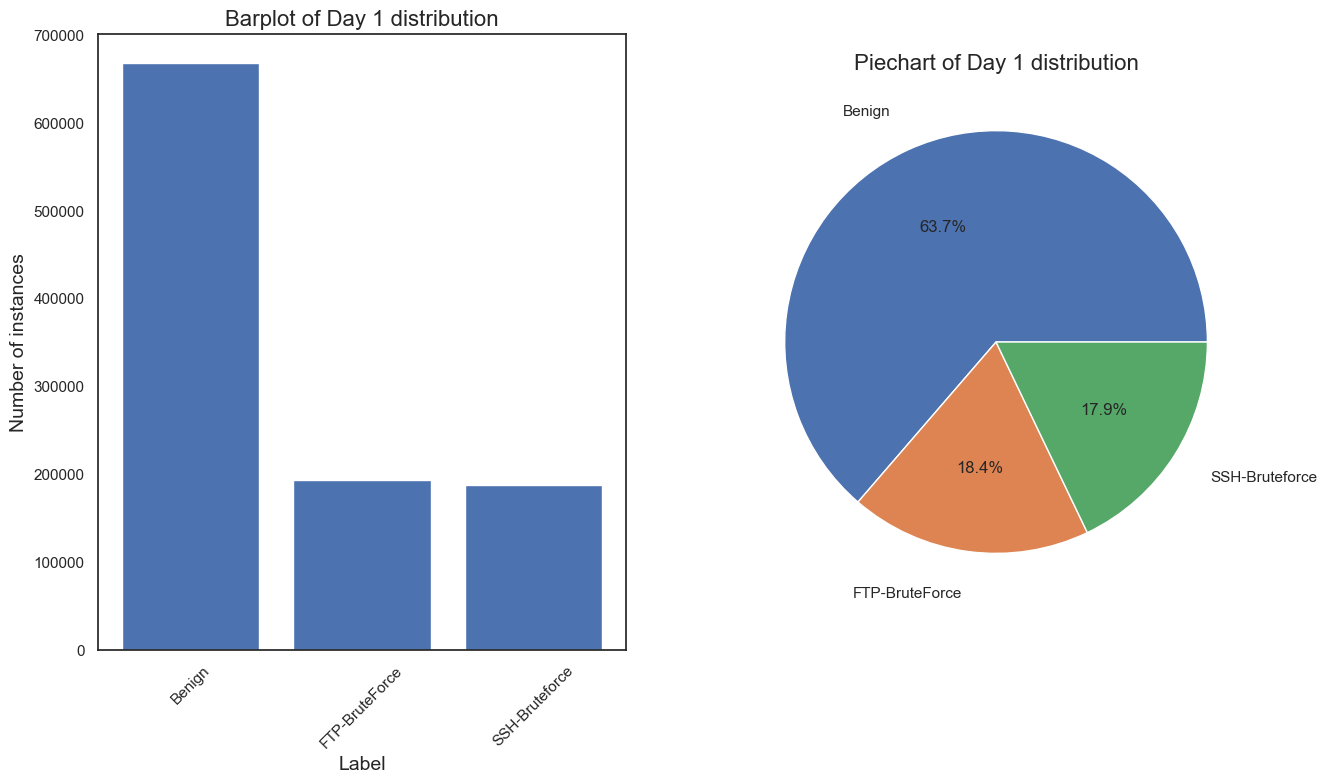

In [13]:
# Plot the data_1 data
plot_distribution(data_1, "data_1", save_plot=True)

**Analysis:**
   - 63.7% of the data is for Benign instances
   - 18.4% of the data is for FTP-BruteForce attack type
   - 17.9% of the data is for the SSH-Bruteforce Attack type
   - The data is very imbalanced but this would be normally in this type of situation.
        - This will be discussed more later

#### Look at how the labels are distributed across the time scale of the Day 1

There is a very large amount of data but its important to know how the labels of each attack are distributed as this will affect later parts of the project.

In [14]:
# Function to look at the distributed
def plot_label_distribution(data, data_name, save_plot=False):
    
    # Extract the day number from the data name
    name, day_number = data_name.split("_")
    name = name.replace("_", "")
    
    # Group the data by timestamp and labels
    label_counts = data.groupby(["Timestamp", "Label"]).size().unstack()
    
    # Create a line plot
    fig, ax = plt.subplots(figsize=(12,6))
    
    # Plot each label as a seperate line
    for label in label_counts.columns:
        ax.plot(label_counts.index, label_counts[label], label=label)
    
    # Add details
    ax.set_title(f"Distribution of Day {day_number} Labels over Time", fontsize=16)
    ax.set_xlabel("Time", fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
    ax.legend()
    
    # Hide the x-axis tick labels
    ax.set_xticklabels([])
    
    # Save the plot to file.
    if save_plot:
        plt.savefig(f"C:/Users/Kolobane/OneDrive/CIT MSc Data Science Modules/_Semester Three - Final Project/Project Two - Network Project/Save Plots/Distribution of {data_name} Labels over time.png")
    
    plt.show()

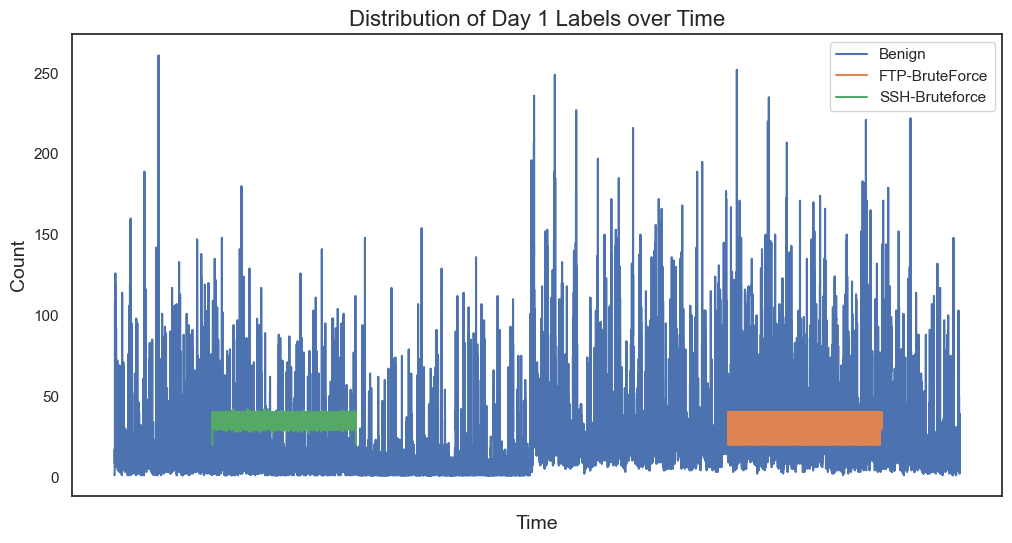

In [15]:
# Call the dataset data_1 
plot_label_distribution(data_1, "data_1", save_plot=True)

**Analysis:**
- The two attack types are grouped together. This is interesting as it does have an effect on how the I perform later actions. One option was to stream in data based on the time stamp but now I will look at other options.

---

### **Day 2: 02-15-2018**

#### Types of Attacks

In [16]:
# What type of attack is in this data
data_2["Label"].unique()

array(['Benign', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris'],
      dtype=object)

**Types of attacks:**
- Benign
- DoS attacks-GoldenEye
- DoS attacks-Slowloris

**DoS attacks - GoldenEye**

A Denial-of-Service(DoS) attack is an attempt to disrupt the normal functioning of a network system or service by overloading it with a continuous request or sending it traffic. GoldenEye is a type of DoS attack that targets Web Servers. It attempts to exploit a servers vulnerabilities in the servers handling of HTTP requests.

The malicious attacker sends a very large amount of HTTP GET or POST requests to the web server it wants to overload consuming all its resources, CPU, memory, etc. By overloading a web server, it is now not available for legitimate users.

**DoS attacks - Slowloris**

Slowloris is another type of DoS attack that also targets web servers. It specifically exploits the way web servers handle concurrent connections. Whereas GoldenEye will attempt to overload a web server with a large amount of requests, Slowloris will open multiple connections to the web server and send HTTP requests slowly and incrementally. It then keeps these connections open by sending partial HTTP requests at regular intervals and prevents the server from closing the connections due to timeout. 

Slowloris exhausts the servers resources and the server is unable to handle any new connections from legitimate users.


#### Description of the Cyber Security attack breakdown

In [17]:
# Call Defination for Day 2 Data
data_structure(data_2, "Day 2")

Day 2
Number of rows for Day 2: 1048575
Number of features for Day 2: 80
Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990


#### Plots to describe distribution for Day 2

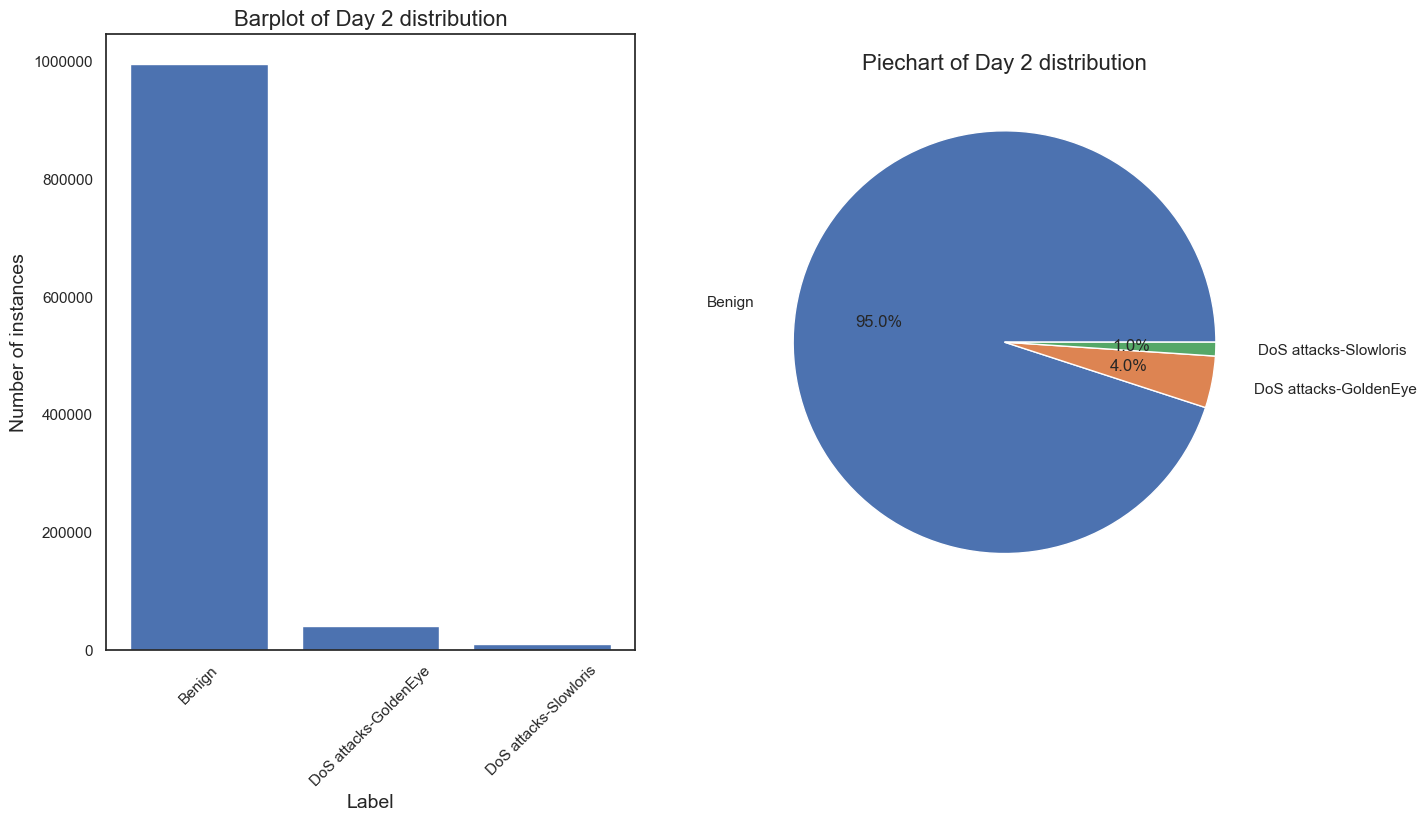

In [18]:
# Plot the data_2 data
plot_distribution(data_2, "data_2", save_plot=True)

**Analysis:**
- 95% of the instances are Benign
- Only 5% and 1% at the two types of attacks.
- Again there is a large class imbalance.

#### Look at how the labels are distributed across the time scale of the Day 2

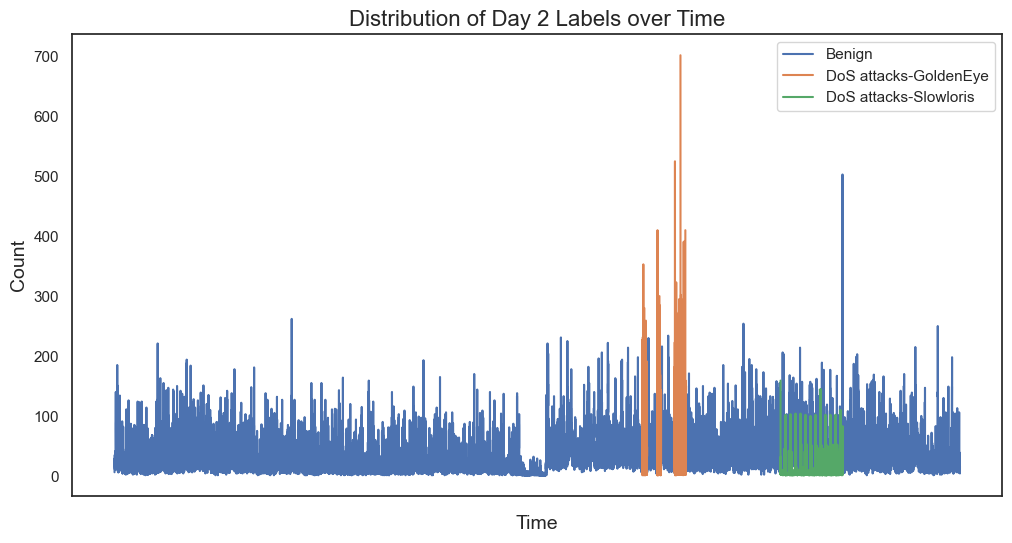

In [19]:
# Call the dataset data_2 
plot_label_distribution(data_2, "data_2", save_plot=True)

**Analysis:**
 - This is a little better where the GoldenEye attacks in orange are in three seperate groups but this is not the case for the rest of the data.
 - Similar to Day 1, the Slowsloris data in green is in one group. 

---

### **Day 3: 02-16-2018**

#### Types of Attacks

In [20]:
# What type of attack is in this data
data_3["Label"].unique()

array(['Benign', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk', 'Label'],
      dtype=object)

**Types of attacks:**
- Benign
- DoS attacks-slowHTTPTest
- DoS attacks-Hulk

**DoS attacks slow HTTP Test**

Another DoS attack on web servers that also exploits concurrent connections by consuming a servers resources by sending a large volume of partial HTTP requests which slows down a servers response time. When the attacker keeps connections open and sends incomplete requests it slows down the servers response time. 

This lead to a degraded server performance over time or a complete Denial of Service.

**DoS attacks Hulk**

Hulk is another DoS attack on web Servers that overloads a server with a large number of requests. Hulk attacks are usually targeted to a specific URL or web server or application.


#### Description of the Cyber Security attack breakdown

In [21]:
# Call Defination for Day 3 Data
data_structure(data_3, "Day 3")

Day 3
Number of rows for Day 3: 1048575
Number of features for Day 3: 80
DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Label                            1


#### Plots to describe distribution for Day 3

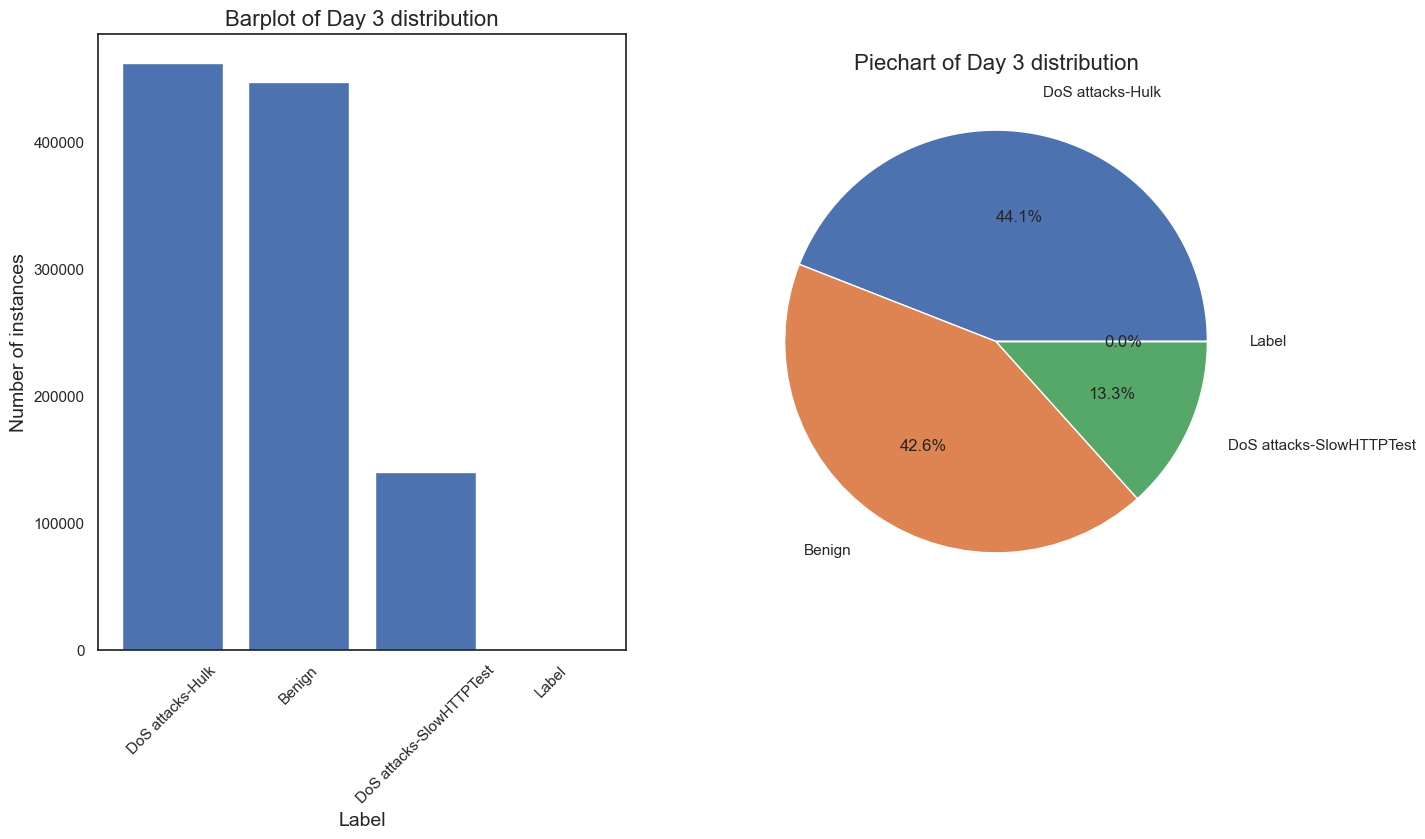

In [22]:
# Plot the data_3 data
plot_distribution(data_3, "data_3", save_plot=True)

**Analysis:**
- 44.1% of the instances are the DoS attacks Hulk Attack type.
- 42.6% of the instances are Benign.
- 13.3% of the instances are the DoS attacks Slow Attack type.
- There is also one instance which has a Label type, this is an error and will be fixed in Data Preprocessing.

#### Look at how the labels are distributed across the time scale of the Day 3

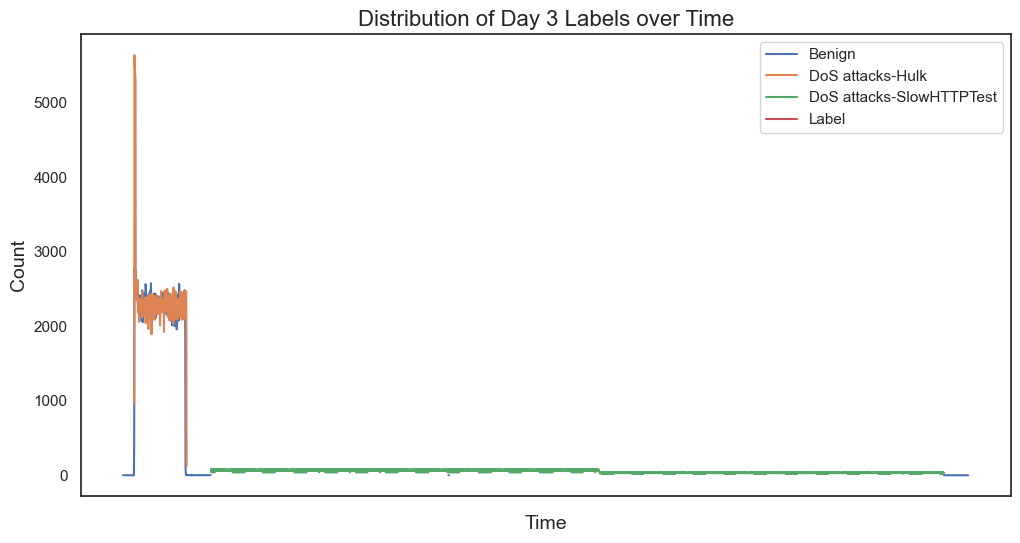

In [23]:
# Call the dataset data_3 
plot_label_distribution(data_3, "data_3")

---

### **Day 4: 02-20-2018**

#### Types of Attacks

In [24]:
# What type of attack is in this data
data_4["Label"].unique()

array(['Benign', 'DDoS attacks-LOIC-HTTP'], dtype=object)

**Types of attacks:**
- Benign
- DDoS attacks-LOIC-HTTP

**DDoS attacks LOIC-HTTP**

A DDoS (Distributed Denial of Service) attack leverages a network of compromised devices, such as bots to flood a sever with a excessive HTTP requests. Similar to the above DoS attacks an attack looks to exploit vulnerabilities in the web servers handling of HTTP protocols overwhelming its resources. 

#### Description of the Cyber Security attack breakdown

In [25]:
# Call Defination for Day 4 Data
data_structure(data_4, "Day 4")

Day 4
Number of rows for Day 4: 7948748
Number of features for Day 4: 84
Benign                    7372557
DDoS attacks-LOIC-HTTP     576191


#### Plots to describe distribution for Day 4

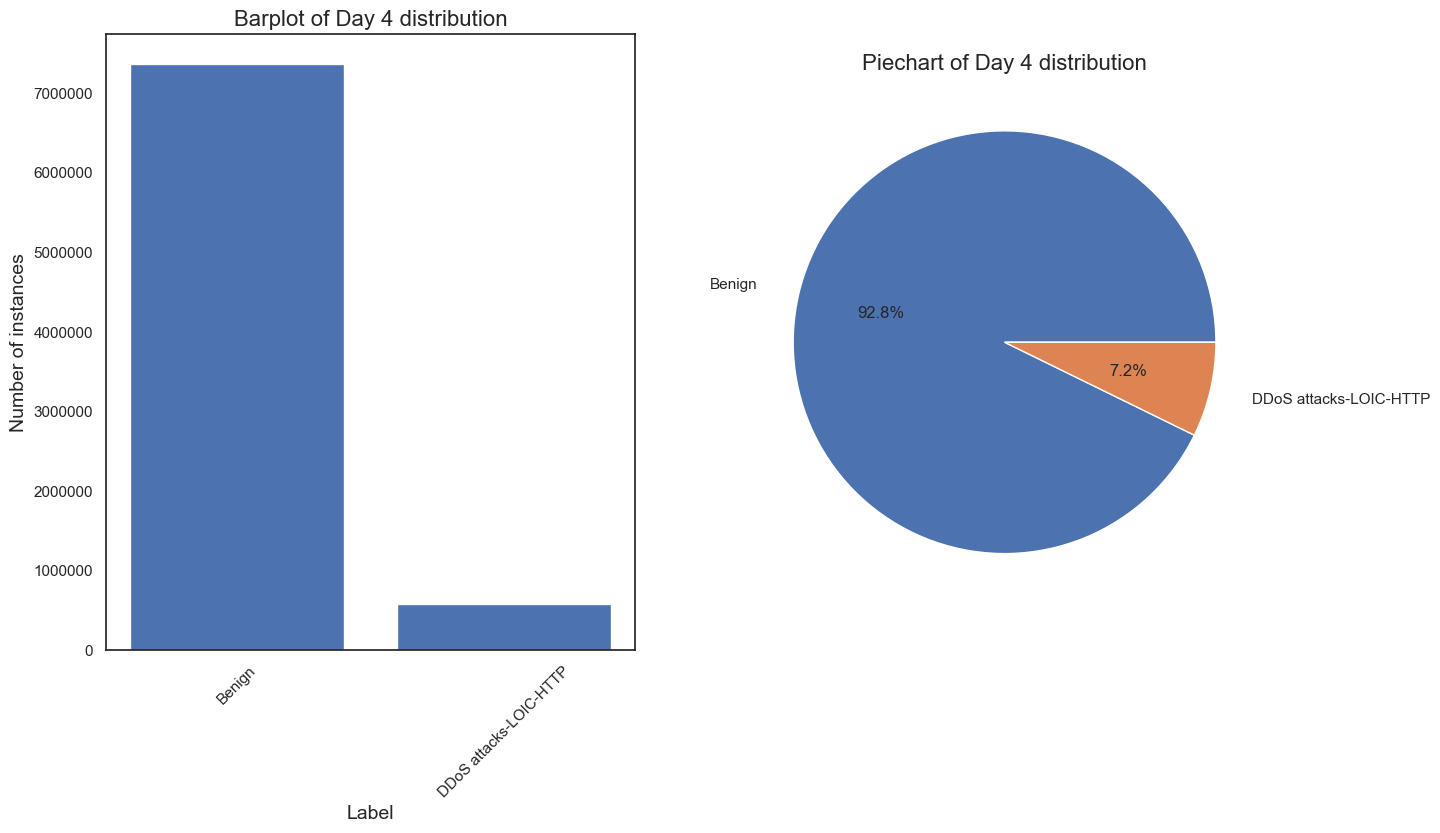

In [26]:
# Plot the data_4 data
plot_distribution(data_4, "data_4", save_plot=True)

**Analysis:**
- 92.8% of the instances are the Benign type.
- 7.2% of the instances are the DDoS LOIC HTTP attack type.

#### Look at how the labels are distributed across the time scale of the Day 4

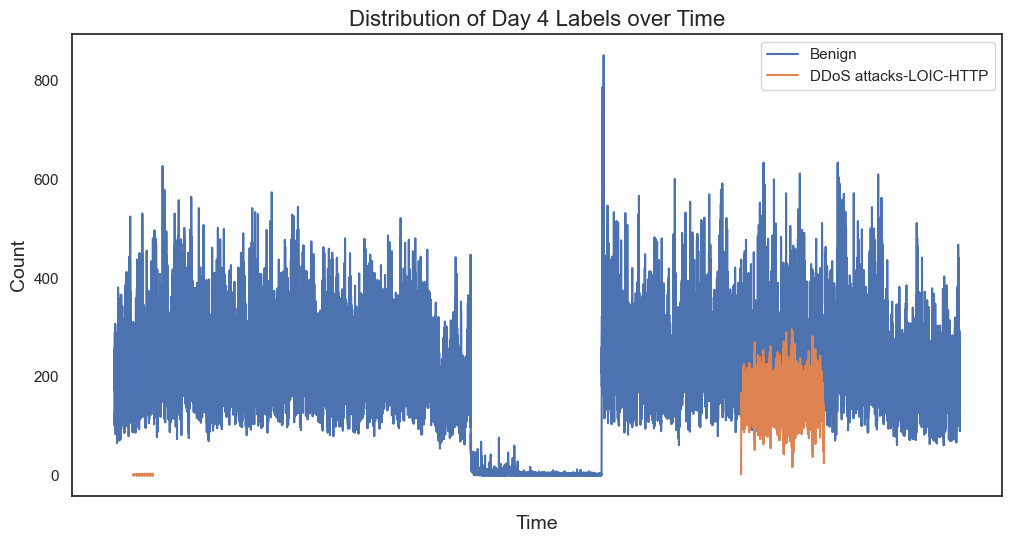

In [27]:
# Call the dataset data_4 
plot_label_distribution(data_4, "data_4")

---

### **Day 5: 02-21-2018**

#### Types of Attacks

In [28]:
# What type of attack is in this data
data_5["Label"].unique()

array(['Benign', 'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC'], dtype=object)

**Types of attacks:**
- Benign
- DDOS attack-LOIC-UDP
- DDOS attack-HOIC

**DDoS attack-LOIC-UDP**

 DDoS attack that uses the LOIC (Low Orbit Ion Cannon) tool to flood the web servers with a large amount of HTTP or UDP requests to exhaust a servers resources.


**DDoS attack-HOIC**

DDoS attack that uses the HOIC(High Orbit Ion Cannon) tool to overwhelm a servers resources. HOIC is know for its ability to launch powerful DDoS attacks.

#### Description of the Cyber Security attack breakdown

In [29]:
# Call Defination for Day 5 Data
data_structure(data_5, "Day 5")

Day 5
Number of rows for Day 5: 1048575
Number of features for Day 5: 80
DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730


#### Plots to describe distribution for Day 5

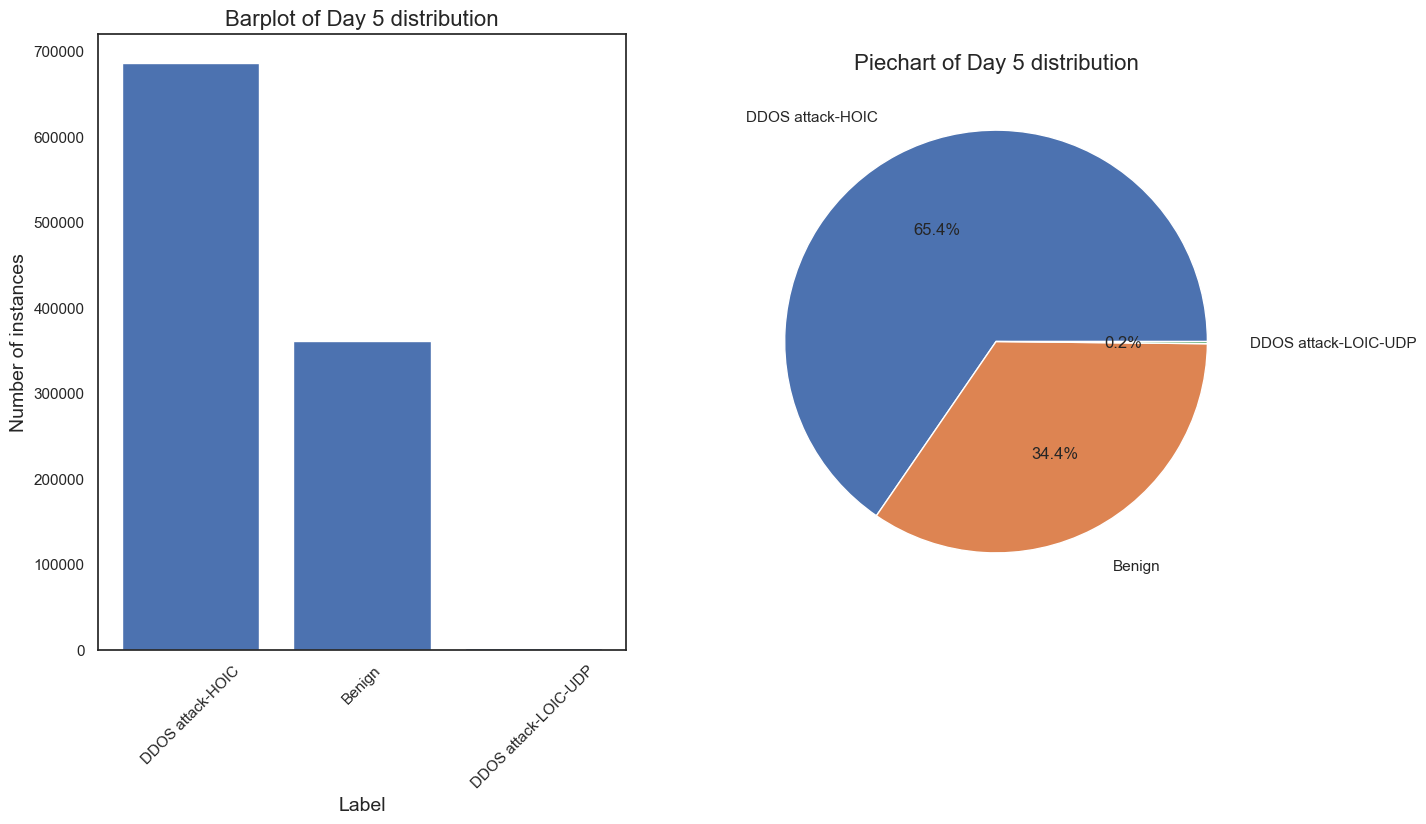

In [30]:
# Plot the data_5 data
plot_distribution(data_5, "data_5", save_plot=True)

**Analysis:**
- 65.4% of the instances are the DDoS attack HOIC Attack type.
- 34.4% of the instances are Benign.
- 0.2% of the instances are the DDoS attack LOIC UDP type.

#### Look at how the labels are distributed across the time scale of the Day 5

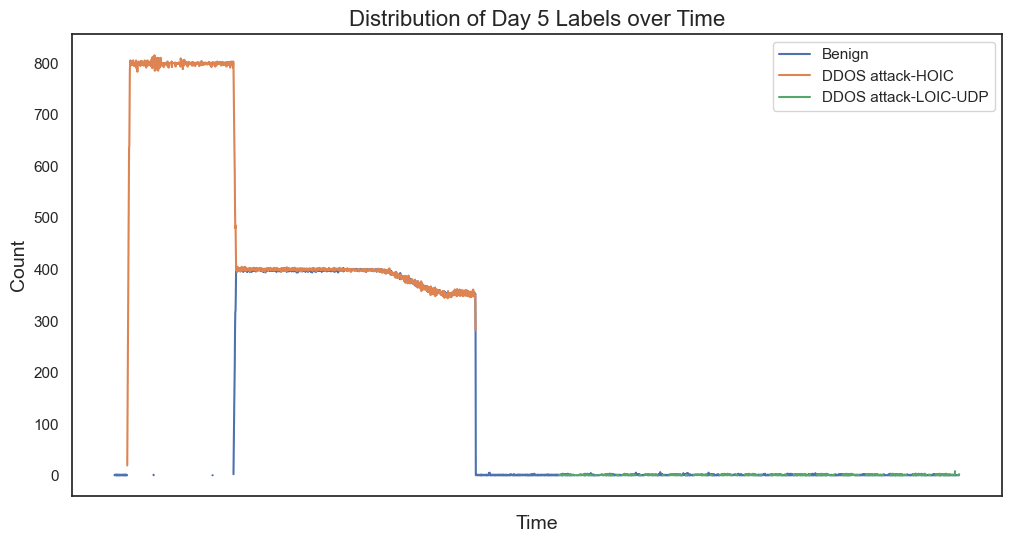

In [31]:
# Call the dataset data_5 
plot_label_distribution(data_5, "data_5")

**Analysis:**

   - Again, the attack data is grouped.

---

### **Day 6: 02-22-2018**

#### Types of Attacks

In [32]:
# What type of attack is in this data
data_6["Label"].unique()

array(['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'],
      dtype=object)

**Types of attacks:**
- Benign
- Brute Force - Web
- Brute Force - XXS
- SQL Injection

**Brute Force - Web**

Another Brute Force attack that attempts to get access to web applications.

**Brute Force - XXS**

XSS or Cross Site Scripting is a type of vulnerability that occurs when web applications fail to properly sanitize user inputs and allows malicious scripts to be injected into web pages viewed by other users.

**SQL Injections**

SQL injections is a common web application vulnerability where an attacker manipulates input field or parameters to inject malicious SQL code into a database query.

#### Description of the Cyber Security attack breakdown

In [33]:
# Call Defination for Day 6 Data
data_structure(data_6, "Day 6")

Day 6
Number of rows for Day 6: 1048575
Number of features for Day 6: 80
Benign              1048213
Brute Force -Web        249
Brute Force -XSS         79
SQL Injection            34


#### Plots to describe distribution for Day 6

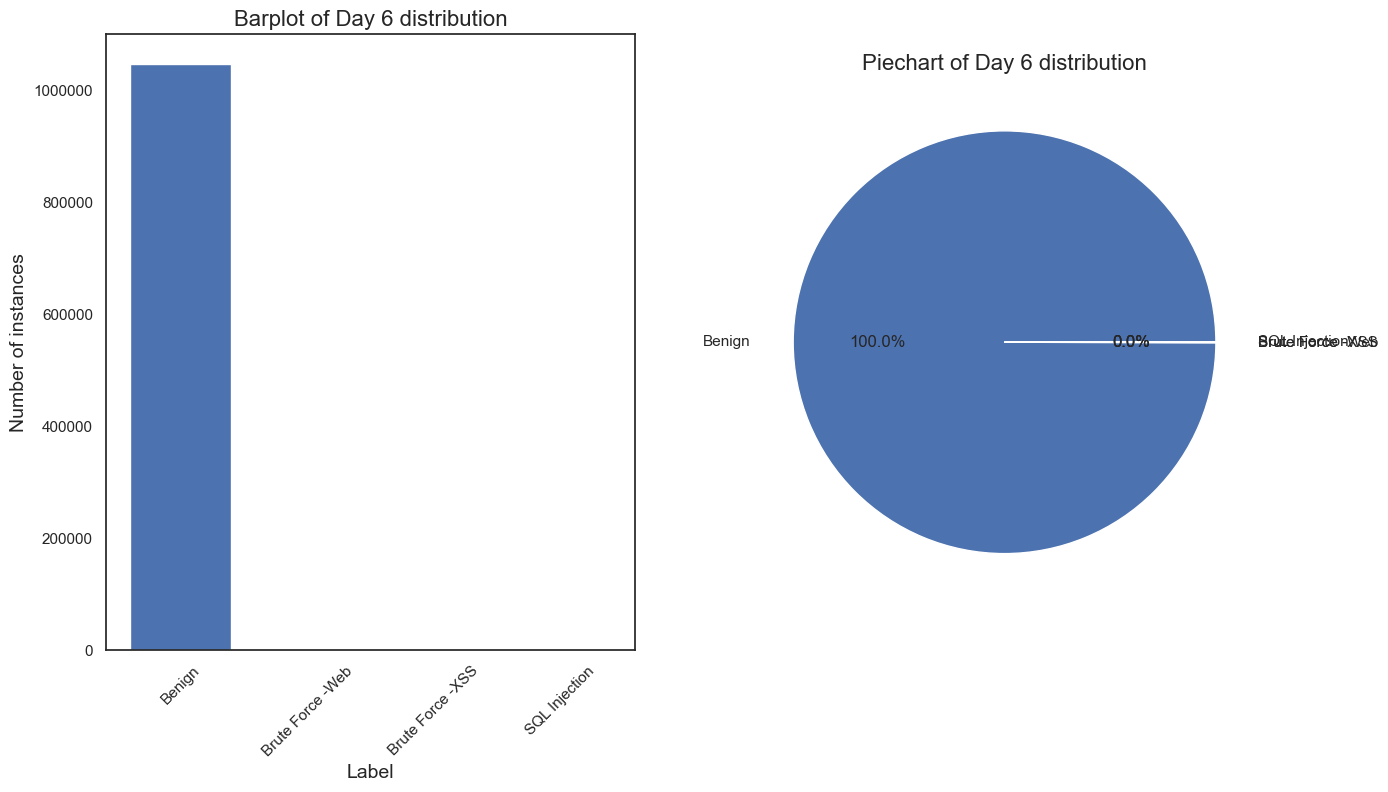

In [34]:
# Plot the data_6 data
plot_distribution(data_6, "data_6", save_plot=True)

**Analysis:**
- 100% of the instances are the Benign type.
- The other three attack types have very small number of instances so are overlapping and showing as 0%.

#### Look at how the labels are distributed across the time scale of the Day 6

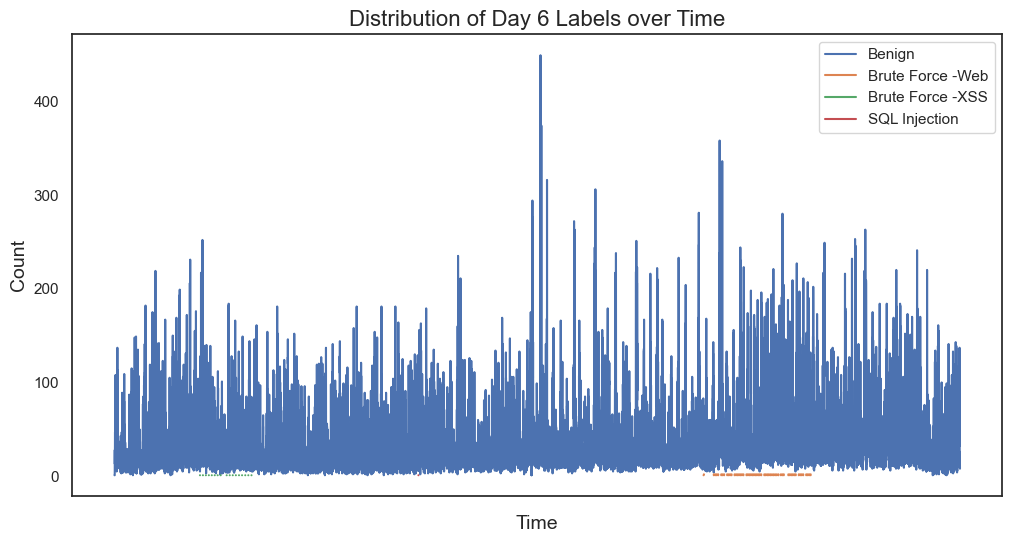

In [35]:
# Call the dataset data_6 
plot_label_distribution(data_6, "data_6")

**Analysis:**

   - Very little data for these attacks, will be interesting to see how the models perform.

---

### **Day 7: 02-23-2018**

#### Types of Attacks

In [36]:
# What type of attack is in this data
data_7["Label"].unique()

array(['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'],
      dtype=object)

**Types of attacks:**
- Benign
- Brute Force - Web
- Brute Force - XXS
- SQL Injection

#### Description of the Cyber Security attack breakdown

In [37]:
# Call Defination for Day 7 Data
data_structure(data_7, "Day 7")

Day 7
Number of rows for Day 7: 1048575
Number of features for Day 7: 80
Benign              1048009
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53


#### Plots to describe distribution for Day 7

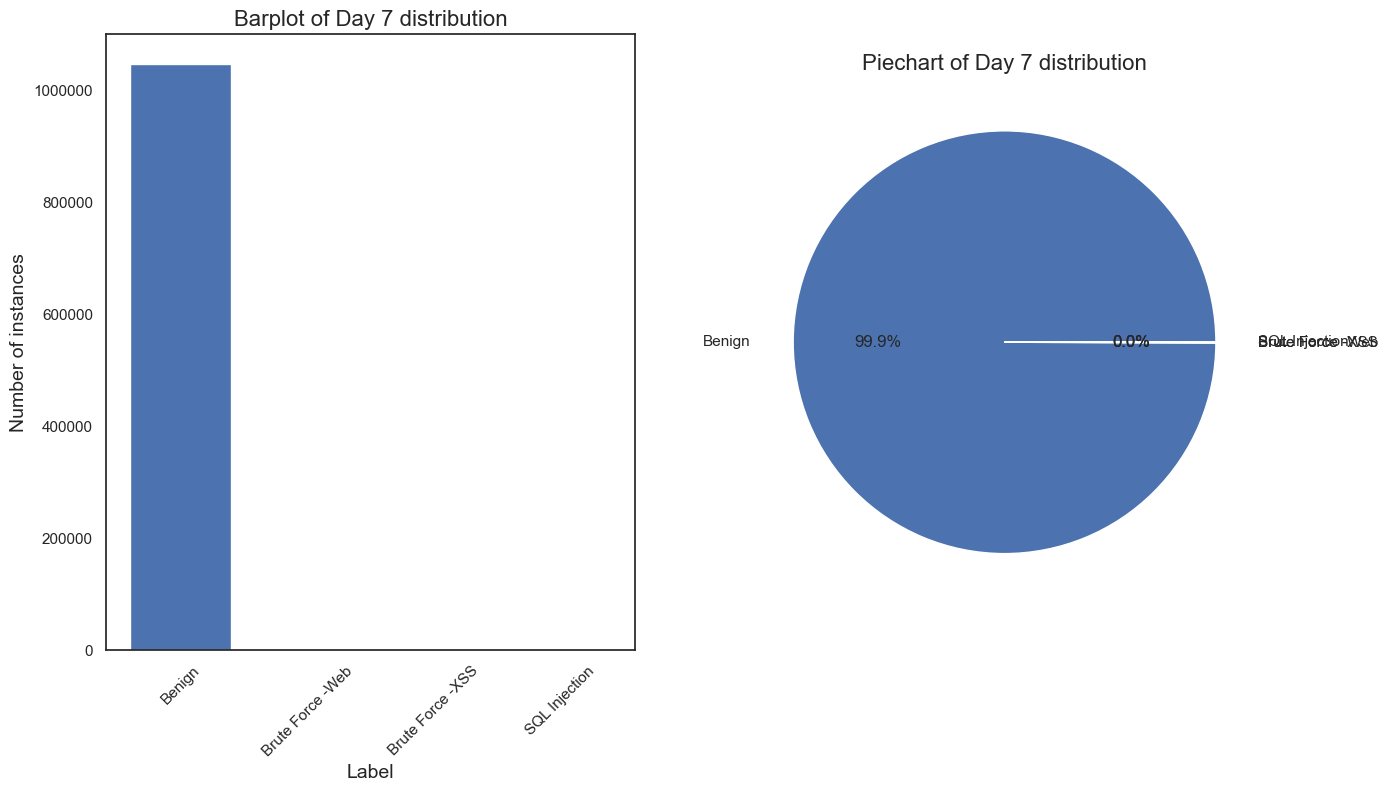

In [38]:
# Plot the data_7 data
plot_distribution(data_7, "data_7", save_plot=True)

**Analysis:**
- 100% of the instances are the Benign type.
- The other three attack types have very small number of instances so are overlapping and showing as 0%.

#### Look at how the labels are distributed across the time scale of the Day 7

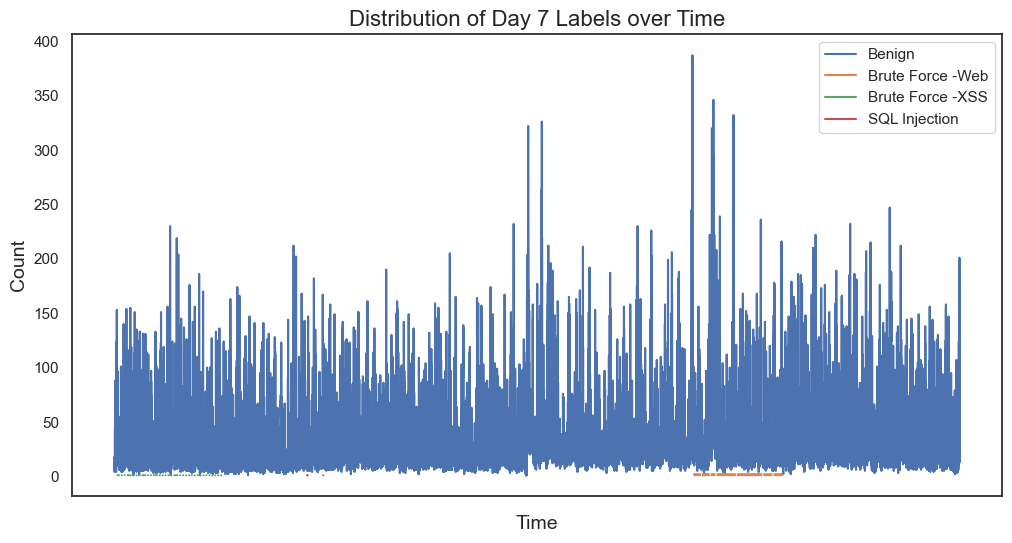

In [39]:
# Call the dataset data_7 
plot_label_distribution(data_7, "data_7")

**Analysis:**

   - Again, Very little data for these attacks, will be interesting to see how the models perform.

---

### **Day 8: 02-28-2018**

#### Types of Attacks

In [40]:
# What type of attack is in this data
data_8["Label"].unique()

array(['Benign', 'Label', 'Infilteration'], dtype=object)

**Types of attacks:**
- Benign
- Infilteration

#### Description of the Cyber Security attack breakdown

In [41]:
# Call Defination for Day 8 Data
data_structure(data_8, "Day 8")

Day 8
Number of rows for Day 8: 613104
Number of features for Day 8: 80
Benign           544200
Infilteration     68871
Label                33


#### Plots to describe distribution for Day 8

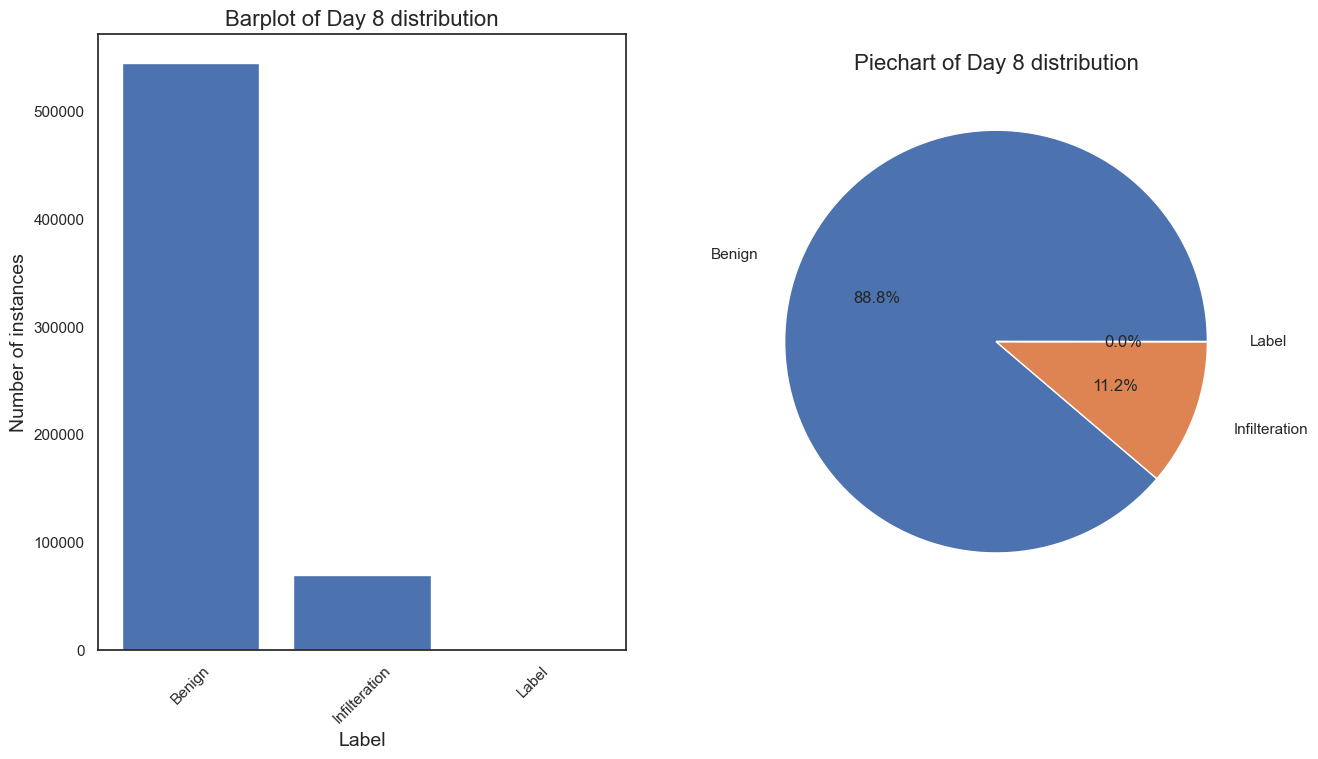

In [42]:
# Plot the data_8 data
plot_distribution(data_8, "data_8", save_plot=True)

**Analysis:**
- 88.8% of the instances are the Benign type.
- 11.2% of the instances are the Infilteration attack type.
- There are 33 instances with the type label, this will be fixed later.

#### Look at how the labels are distributed across the time scale of the Day 8

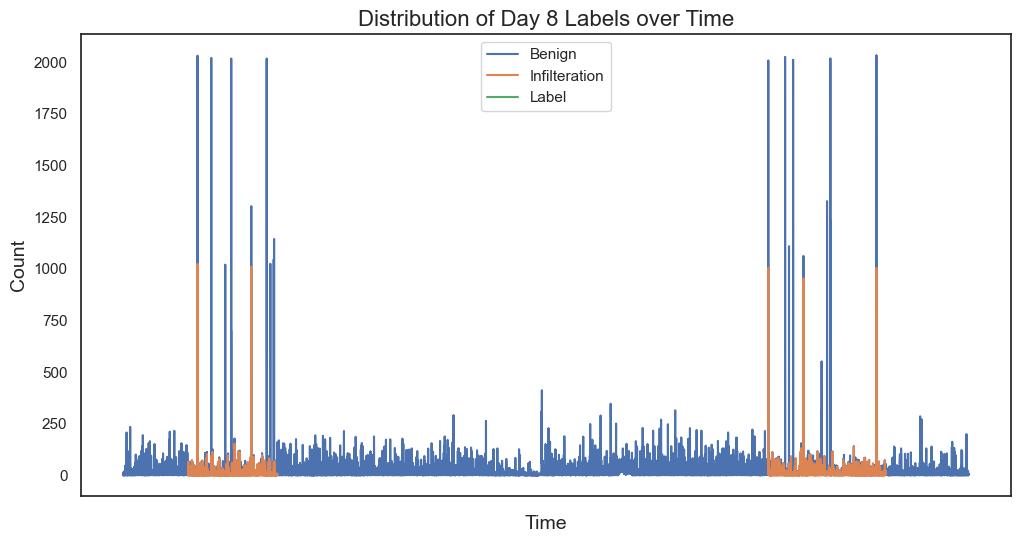

In [43]:
# Call the dataset data_8 
plot_label_distribution(data_8, "data_8")

**Analysis:**

   - Attacks are grouped as we have seen before.

---

### **Day 9: 03-01-2018**

#### Types of Attacks

In [44]:
# What type of attack is in this data
data_9["Label"].unique()

array(['Benign', 'Label', 'Infilteration'], dtype=object)

**Types of attacks:**
- Benign
- Infiltration

**Infiltration**

Infiltration refers to the act of trying to gain unauthorized access to a network system.

#### Description of the Cyber Security attack breakdown

In [45]:
# Call Defination for Day 9 Data
data_structure(data_9, "Day 9")

Day 9
Number of rows for Day 9: 331125
Number of features for Day 9: 80
Benign           238037
Infilteration     93063
Label                25


#### Plots to describe distribution for Day 9

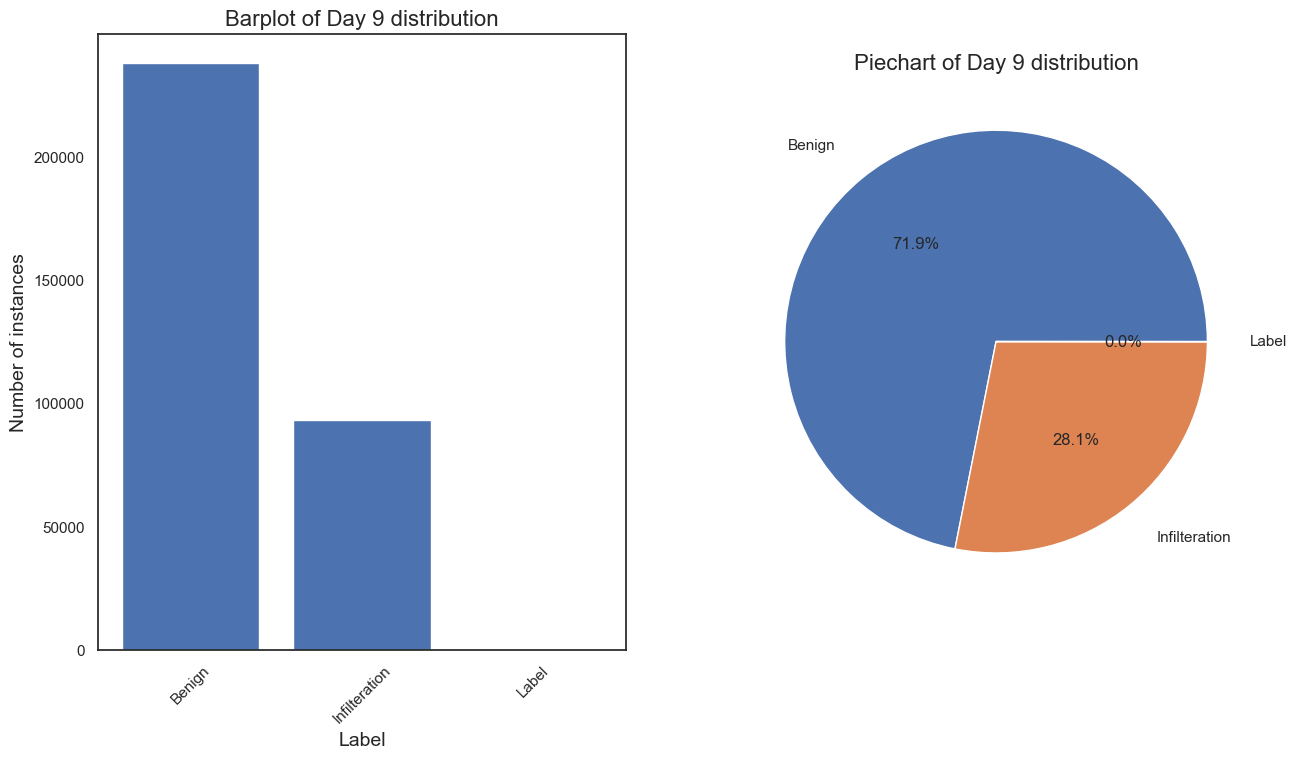

In [46]:
# Plot the data_9 data
plot_distribution(data_9, "data_9", save_plot=True)

**Analysis:**
- 71.9% of the instances are the Benign type.
- 28.1% of the instances are the Infilteration attack type.
- There are 25 instances with the type label, this will be fixed later.

#### Look at how the labels are distributed across the time scale of the Day 9

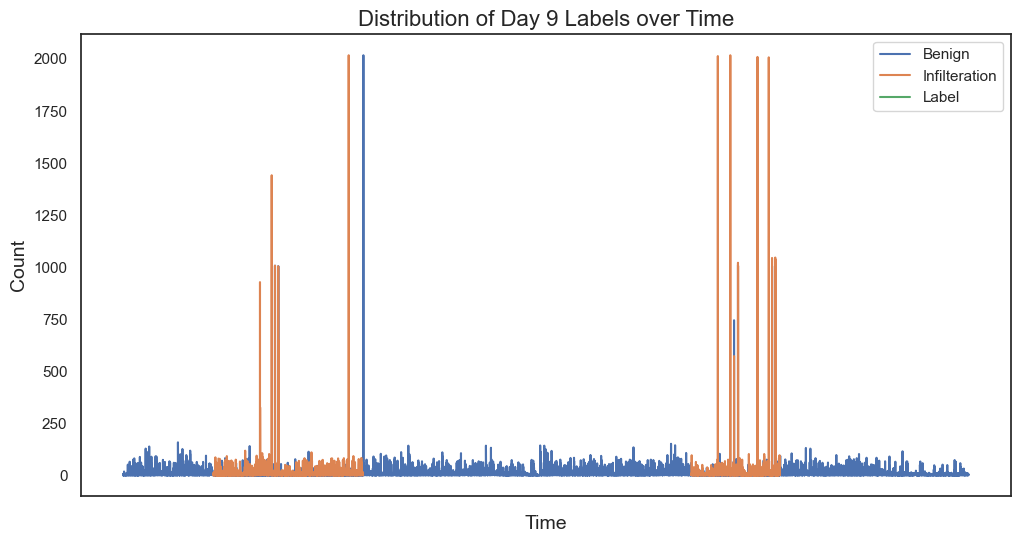

In [47]:
# Call the dataset data_9 
plot_label_distribution(data_9, "data_9")

**Analysis:**
   - The attacks are in two groups as seen previously.

---

### **Day 10: 03-02-2018**

#### Types of Attacks

In [48]:
# What type of attack is in this data
data_10["Label"].unique()

array(['Benign', 'Bot'], dtype=object)

**Types of attacks:**
- Benign
- Bot

**Bot**

A type of attack.

#### Description of the Cyber Security attack breakdown

In [49]:
# Call Defination for Day 1 Data
data_structure(data_10, "Day 10")

Day 10
Number of rows for Day 10: 1048575
Number of features for Day 10: 80
Benign    762384
Bot       286191


#### Plots to describe distribution for Day 10

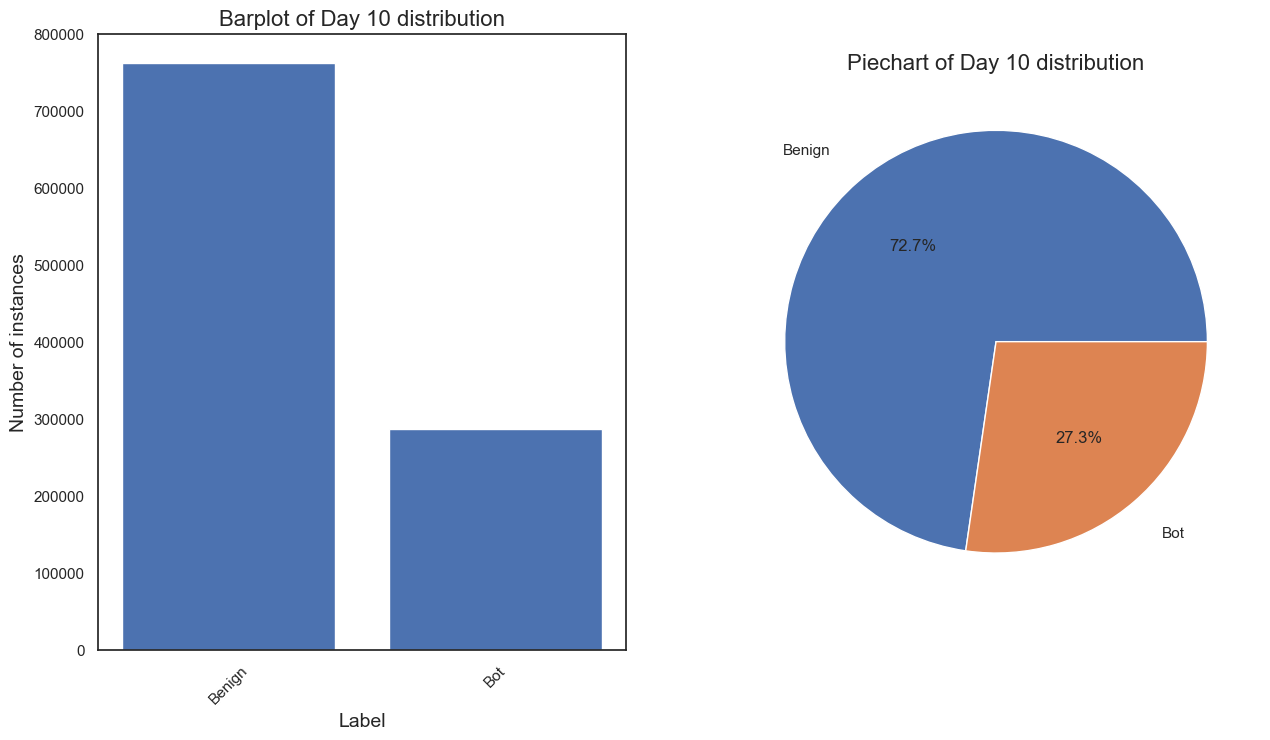

In [50]:
# Plot the data_10 data
plot_distribution(data_10, "data_10", save_plot=True)

**Analysis:**
- 72.7% of the instances are the Benign type.
- 27.3% of the instances are the bot attack type.

#### Look at how the labels are distributed across the time scale of the Day 10

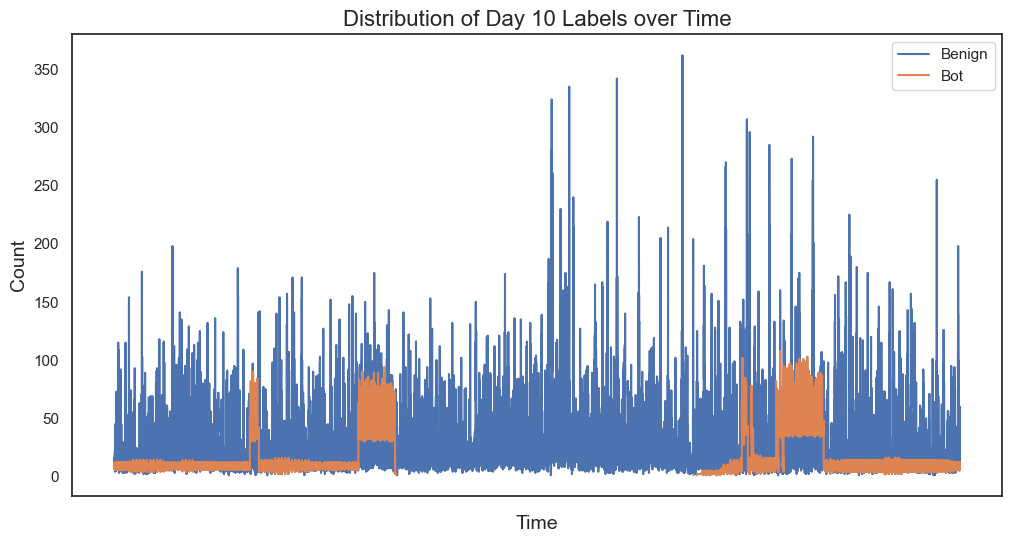

In [51]:
# Call the dataset data_10 
plot_label_distribution(data_10, "data_10")

**Analysis:**

   - The attacks are in in two groups as seen previously.

---

In [52]:
print("Notebook ran fully. No issues.")

Notebook ran fully. No issues.


---